### Evan Agovino
## CSC 217 - Spring 2019  - Final Project

For my project, I will explore the percentage of adults with bachelor's degrees in America, looking at how the rate has changed between 2000 and 2015\* on the county and state level. I want to explore which states have high or low rates, and whether the states that have high or low rates have changed over time. Finally, I will also look to see if there is a statisically significant difference in the percentage of adults with a bachelor's degree between blue and red states via a hypothesis test.

The data that I will be using to pull this from the U.S. Department of Agriculture, located [here](https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/). I've pulled it down to my local computer for ease of use.

First I'll import the necessary packages down, along with downloading and cleaning the data.

*The '2015' data is aggregated census data from 2013-17, but for the sake of simplicity, I will refer to it as 2015 here.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [2]:
#If your dataset is locally loaded rather than from the internet, make sure it's included with your submission.
education = pd.read_csv('Education.csv', encoding='ISO-8859-1', header=0)
education = education.iloc[:, :-1]
education = education.dropna().reset_index(drop=True)
education.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2013-17","High school diploma only, 2013-17","Some college or associate's degree, 2013-17","Bachelor's degree or higher, 2013-17","Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17"
0,1001.0,AL,Autauga County,2.0,2.0,2.0,2.0,"6,611","3,757",933,...,26.9,18.0,"4,521","12,363","10,697","9,176",12.3,33.6,29.1,25.0
1,1003.0,AL,Baldwin County,4.0,5.0,3.0,2.0,"18,726","8,426","2,334",...,29.3,23.1,"13,997","39,771","45,286","43,968",9.8,27.8,31.7,30.7
2,1005.0,AL,Barbour County,6.0,6.0,6.0,6.0,"8,120","2,242",581,...,21.3,10.9,"4,960","6,549","4,707","2,218",26.9,35.5,25.5,12.0
3,1007.0,AL,Bibb County,1.0,1.0,1.0,1.0,"5,272","1,402",238,...,20.4,7.1,"2,833","6,958","3,971","2,097",17.9,43.9,25.0,13.2
4,1009.0,AL,Blount County,1.0,1.0,1.0,1.0,"10,677","3,440",626,...,24.8,9.6,"7,980","12,740","13,583","5,172",20.2,32.3,34.4,13.1


In [3]:
#Select only relevant columns
education = education[["State", "Area name",
"Percent of adults with a bachelor's degree or higher, 2000",  
"Percent of adults with a bachelor's degree or higher, 2013-17"]]
education.columns = ['State', 'County', 'Bachelor_2000', 'Bachelor_2015']
education['Bachelor_Diff'] = education['Bachelor_2015'] - education['Bachelor_2000']

### Exploratory Analysis

First I'll do some exploratory analysis of the two distributions.

Text(0.5,0.92,"% of Adults With a Bachelor's Degree Per County in 2000")

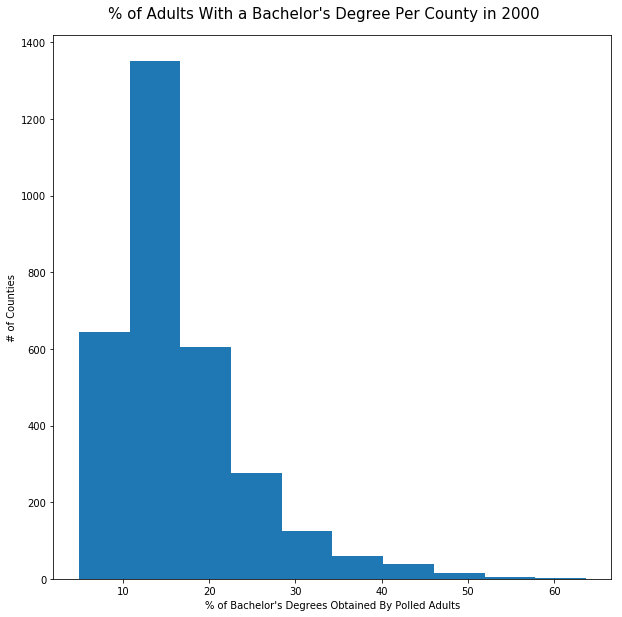

In [4]:
fig = plt.figure(figsize=(10,10))
plt.hist(education["Bachelor_2000"]);
plt.xlabel("% of Bachelor's Degrees Obtained By Polled Adults")
plt.ylabel("# of Counties")
fig.suptitle("% of Adults With a Bachelor's Degree Per County in 2000", fontsize=15, y=0.92)

Text(0.5,0.92,"% of Adults With a Bachelor's Degree Per County in 2015")

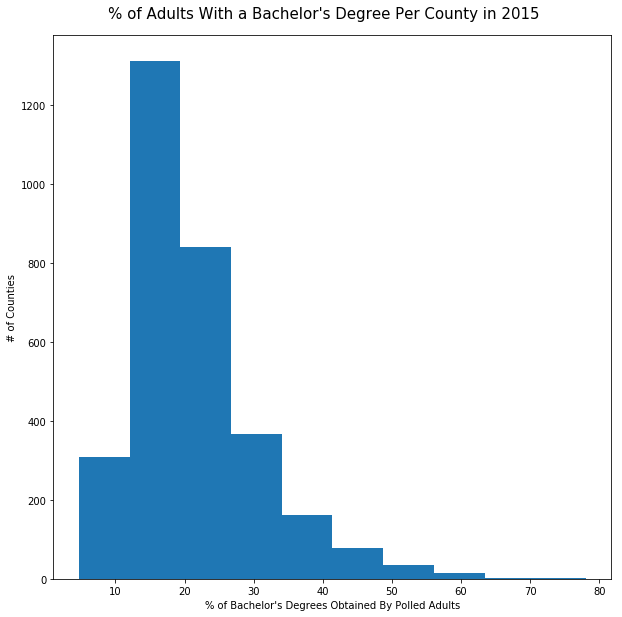

In [5]:
fig = plt.figure(figsize=(10,10))
plt.hist(education["Bachelor_2015"]);
plt.xlabel("% of Bachelor's Degrees Obtained By Polled Adults")
plt.ylabel("# of Counties")
fig.suptitle("% of Adults With a Bachelor's Degree Per County in 2015", fontsize=15, y=0.92)

Text(0.5,0.92,"% of Adults With a Bachelor's Degree Per County in 2000 and 2015")

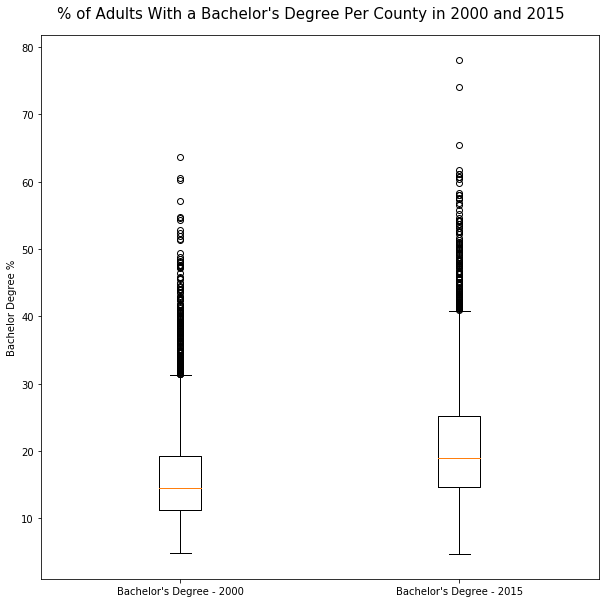

In [6]:
fig = plt.figure(figsize=(10,10))
plt.boxplot([education["Bachelor_2000"],
            education["Bachelor_2015"]]
            )
plt.xticks([1,2], ["Bachelor's Degree - 2000", "Bachelor's Degree - 2015"])
plt.ylabel("Bachelor Degree %")
fig.suptitle("% of Adults With a Bachelor's Degree Per County in 2000 and 2015", fontsize=15, y=0.92)

In [7]:
#Means
education.mean()

Bachelor_2000    16.532160
Bachelor_2015    21.188928
Bachelor_Diff     4.656768
dtype: float64

In [8]:
#Upper Whisker
education.quantile(q=0.75) + (1.5 * (education.quantile(q=0.75) - education.quantile(q=0.25)))

Bachelor_2000    31.30
Bachelor_2015    40.95
Bachelor_Diff    11.80
dtype: float64

In [9]:
#Maximum
education[['Bachelor_2000', 'Bachelor_2015']].max()

Bachelor_2000    63.7
Bachelor_2015    78.1
dtype: float64

In [10]:
#Variance
education.var()

Bachelor_2000    60.760979
Bachelor_2015    85.761273
Bachelor_Diff     8.582577
dtype: float64

In [11]:
#Range
education[['Bachelor_2000', 'Bachelor_2015']].max() - education[['Bachelor_2000', 'Bachelor_2015']].min()

Bachelor_2000    58.8
Bachelor_2015    73.4
dtype: float64

In [12]:
#Interquartile Range
education.quantile(q=0.75) - education.quantile(q=0.25)

Bachelor_2000     8.0
Bachelor_2015    10.5
Bachelor_Diff     3.6
dtype: float64

As we can see in the data and boxplot above, the rate of adults with bachelors degrees in America has gone up between the two censuses in 2000 and 2015. While the mean percentage of adults with a bachelor's degree has gone up by 4.7%, from 16.5% in 2000 to 21.2% in 2015, the more notable trend is in the increase of counties on the upper end of the distribution. The value of the upper whisker increased by 9.65%, from 31.3% to 40.95%, while the overall maximum increased by 14.4%, from 63.7% to 78.1%.

The overall spread of the distribution also saw an increase, as variance, range, and the value of the Interquartile Range went up between the two time periods.

Above we see that both distributions have a very heavy right skew.

### Relationship Between 2000 and 2015 Results

Next I'll explore the relationship between the 2000 and 2015 results by county.

In [13]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

In [14]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(education["Bachelor_2000"],
                                                                        education["Bachelor_2015"])

Text(0.5,0.92,"% of Adults With a Bachelor's Degree Per County in 2000 and 2015")

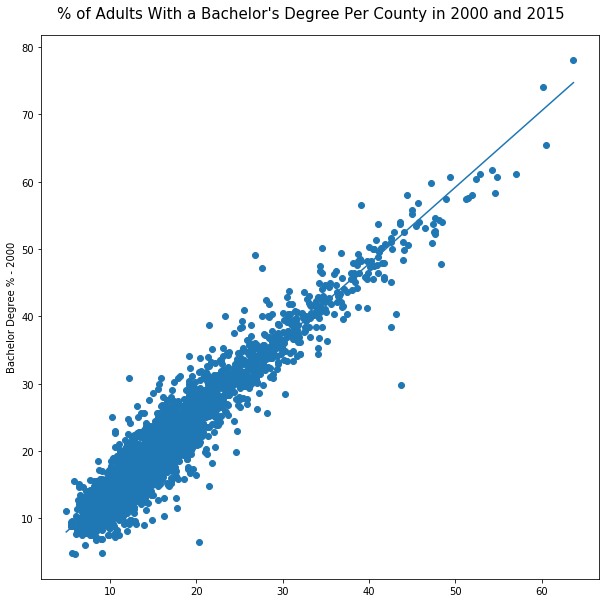

In [15]:
fig = plt.figure(figsize=(10,10))
plt.scatter(education["Bachelor_2000"],
            education["Bachelor_2015"])
sorted_order = np.argsort(education["Bachelor_2000"])
plt.plot(education["Bachelor_2000"][sorted_order], predictions[sorted_order])
plt.ylabel("Bachelor Degree % - 2015")
plt.ylabel("Bachelor Degree % - 2000")
fig.suptitle("% of Adults With a Bachelor's Degree Per County in 2000 and 2015", fontsize=15, y=0.92)

In [16]:
#R-Squared Value
np.var(predictions) / np.var(education["Bachelor_2015"])

0.9128563195494045

Text(0.5,0.92,'Residuals')

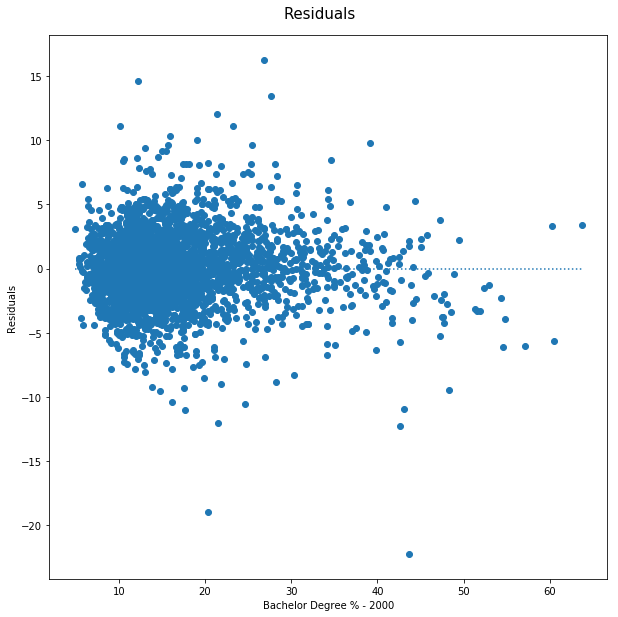

In [17]:
fig = plt.figure(figsize=(10,10))
plt.scatter(education["Bachelor_2000"], residuals)
plt.plot([education["Bachelor_2000"].min(), education["Bachelor_2000"].max()], [0,0], linestyle='dotted')
plt.xlabel("Bachelor Degree % - 2000")
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

The relationship between the % of a county's bachelor degree in 2000 to the % of that same county's bachelor degree in 2015 looks to be highly linear, albeit clustered on the lower end as both distributions are highly right skewed. While there is an R-squared value of over 91%, the heteroskedasticity of the residuals plot leaves a predictive linear model unreliable.

### Exploring Data by State

Next I'll take the mean of the county results for each state and explore the data by state.

In [18]:
state_grouped = education.groupby('State').mean().reset_index()
state_grouped['Bachelor_Diff'] = state_grouped["Bachelor_2015"] - state_grouped["Bachelor_2000"]

In [19]:
#Five Highest States - 2000
state_grouped.sort_values('Bachelor_2000', ascending=False).head()

,State,Bachelor_2000,Bachelor_2015,Bachelor_Diff
7,DC,39.100000,56.600000,17.500000
19,MA,32.057143,40.178571,8.121429
39,RI,30.840000,39.640000,8.800000
6,CT,29.550000,36.412500,6.862500
31,NJ,27.990476,35.852381,7.861905


In [20]:
#Five Highest States - 2015
state_grouped.sort_values('Bachelor_2015', ascending=False).head()

,State,Bachelor_2000,Bachelor_2015,Bachelor_Diff
7,DC,39.100000,56.600000,17.500000
19,MA,32.057143,40.178571,8.121429
39,RI,30.840000,39.640000,8.800000
6,CT,29.550000,36.412500,6.862500
31,NJ,27.990476,35.852381,7.861905


In [21]:
#Five Lowest States - 2000
state_grouped.sort_values('Bachelor_2000').head()

,State,Bachelor_2000,Bachelor_2015,Bachelor_Diff
17,KY,11.554167,15.859167,4.305000
49,WV,12.136364,16.105455,3.969091
42,TN,12.145263,16.620000,4.474737
2,AR,12.312000,15.772000,3.460000
18,LA,13.285937,16.778125,3.492188


In [22]:
#Five Lowest States - 2015
state_grouped.sort_values('Bachelor_2015').head()

,State,Bachelor_2000,Bachelor_2015,Bachelor_Diff
2,AR,12.312000,15.772000,3.460000
17,KY,11.554167,15.859167,4.305000
49,WV,12.136364,16.105455,3.969091
42,TN,12.145263,16.620000,4.474737
18,LA,13.285937,16.778125,3.492188


The five states with the highest rate of bachelor's degrees in 2000 have also have the highest rate of bachelor's degrees in 2000, while the five states with the lowest rate of bachelor's degrees in 2000 have the lowest rate of bachelor's degrees in 2015.

Text(0.5,0.92,'Difference in % of Adults With a Bachelor Degree Between 2000 and 2015')

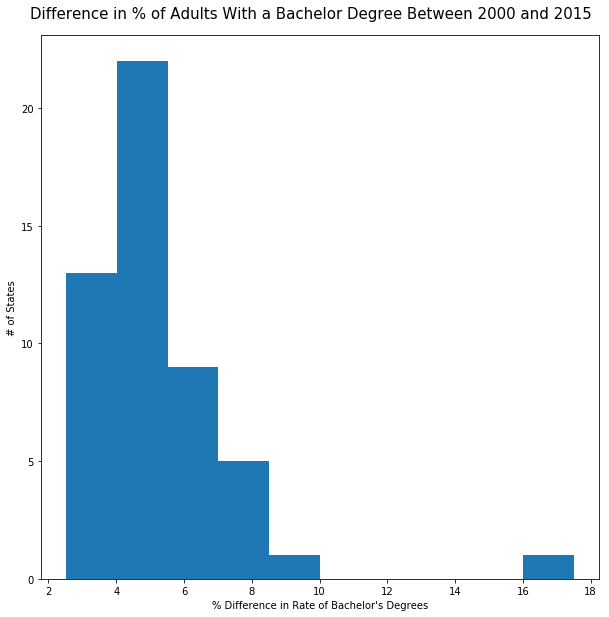

In [23]:
fig = plt.figure(figsize=(10,10))
plt.hist(state_grouped['Bachelor_Diff']);
plt.xlabel("% Difference in Rate of Bachelor's Degrees")
plt.ylabel("# of States")
fig.suptitle("Difference in % of Adults With a Bachelor Degree Between 2000 and 2015", fontsize=15, y=0.92)

In [24]:
#5 States with Greatest Gain in Bachelor's %
state_grouped.sort_values('Bachelor_Diff', ascending=False).head()

,State,Bachelor_2000,Bachelor_2015,Bachelor_Diff
7,DC,39.100000,56.600000,17.500000
39,RI,30.840000,39.640000,8.800000
19,MA,32.057143,40.178571,8.121429
31,NJ,27.990476,35.852381,7.861905
20,MD,23.966667,31.508333,7.541667


The distribution of the difference in the rate of bachelor's degrees between two periods is highly skewed, although DC is a significant positive outlier, with 39% of its citizens having a bachelor's degree in 2000 and over 56% havign a bachelor's degree in 2015!

Text(0.5,0.92,"% of Adults With a Bachelor's Degree Per State in 2000 and 2015")

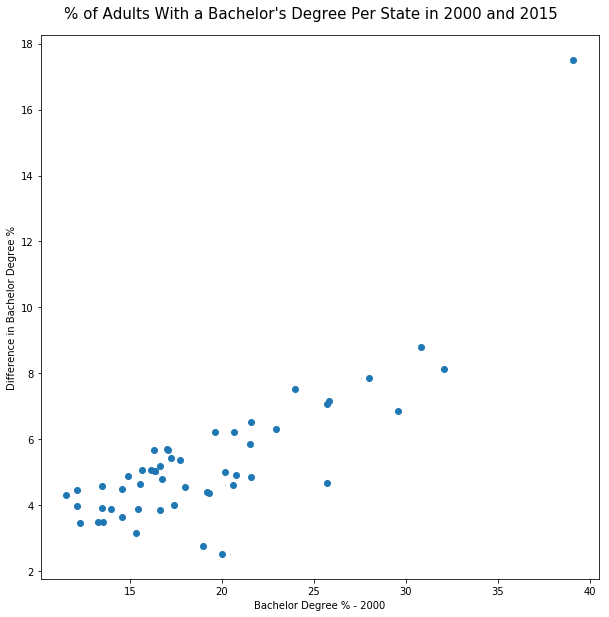

In [25]:
fig = plt.figure(figsize=(10,10))
plt.scatter(state_grouped['Bachelor_2000'], state_grouped['Bachelor_Diff'])
plt.ylabel("Difference in Bachelor Degree %")
plt.xlabel("Bachelor Degree % - 2000")
fig.suptitle("% of Adults With a Bachelor's Degree Per State in 2000 and 2015", fontsize=15, y=0.92)

Overall, the relationship between the mean rate of a bachelor's degree in a state and the difference in mean rate between 2000 and 2015 is postiive, though DC is such an outlier it throws the whole graph.

Text(0.5,0.92,"% of Adults With a Bachelor's Degree Per State in 2000 and 2015")

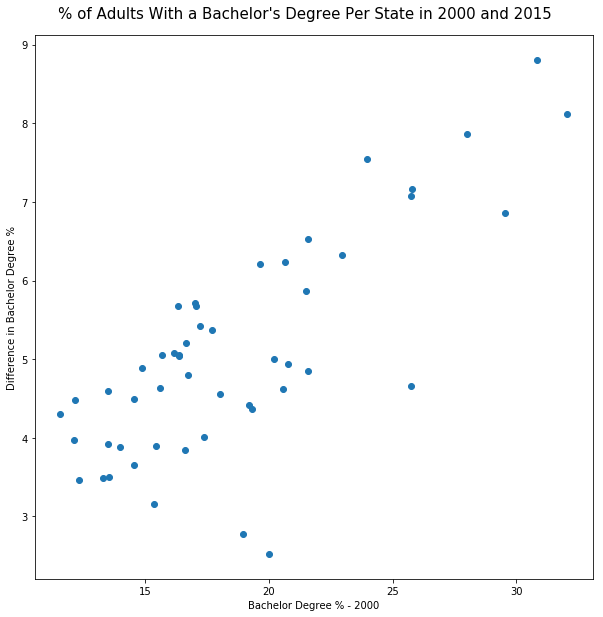

In [26]:
fig = plt.figure(figsize=(10,10))
plt.scatter(state_grouped[state_grouped['State'] != 'DC']['Bachelor_2000'], state_grouped[state_grouped['State'] != 'DC']['Bachelor_Diff'])
plt.ylabel("Difference in Bachelor Degree %")
plt.xlabel("Bachelor Degree % - 2000")
fig.suptitle("% of Adults With a Bachelor's Degree Per State in 2000 and 2015", fontsize=15, y=0.92)

With DC removed from the graph, the relationship looks linear.

In [27]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(state_grouped[state_grouped['State'] != 'DC']['Bachelor_2000'],
                                                                        state_grouped[state_grouped['State'] != 'DC']['Bachelor_Diff'])

/Users/evan.agovino/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Text(0.5,0.92,"% of Adults With a Bachelor's Degree Per State in 2000 and 2015")

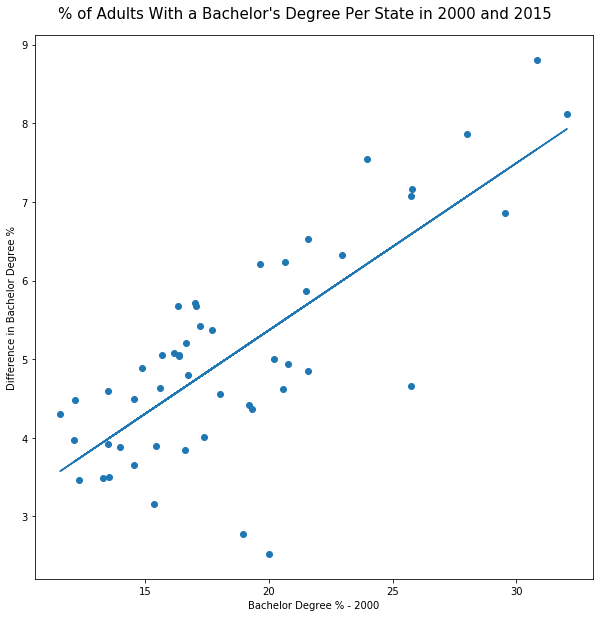

In [28]:
fig = plt.figure(figsize=(10,10))
plt.scatter(state_grouped[state_grouped['State'] != 'DC']['Bachelor_2000'], state_grouped[state_grouped['State'] != 'DC']['Bachelor_Diff'])
sorted_order = np.argsort(state_grouped[state_grouped['State'] != 'DC']['Bachelor_2000'])
plt.plot(state_grouped[state_grouped['State'] != 'DC']['Bachelor_2000'][sorted_order], predictions[sorted_order])
plt.ylabel("Difference in Bachelor Degree %")
plt.xlabel("Bachelor Degree % - 2000")
fig.suptitle("% of Adults With a Bachelor's Degree Per State in 2000 and 2015", fontsize=15, y=0.92)

Text(0.5,0.92,'Residuals')

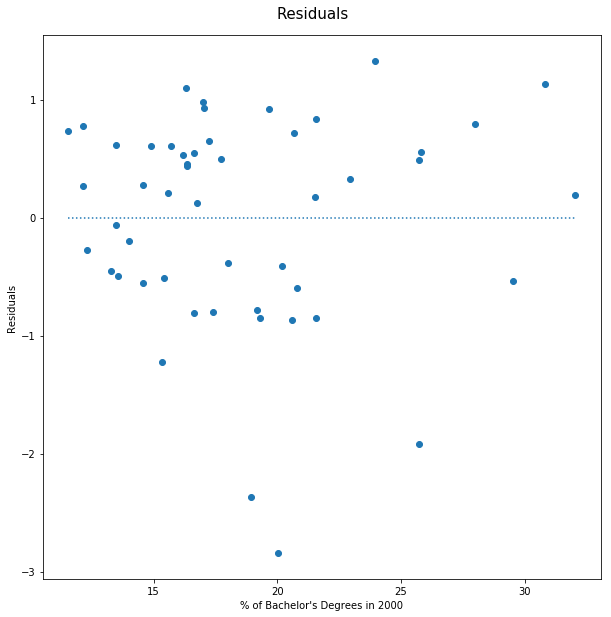

In [29]:
fig = plt.figure(figsize=(10,10))
plt.scatter(state_grouped[state_grouped['State'] != 'DC']['Bachelor_2000'], residuals)
plt.plot([state_grouped[state_grouped['State'] != 'DC']['Bachelor_2000'].min(), state_grouped[state_grouped['State'] != 'DC']['Bachelor_2000'].max()], [0,0], linestyle='dotted')
plt.xlabel("% of Bachelor's Degrees in 2000")
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

In [30]:
#R-Squared Value
np.var(predictions) / np.var(state_grouped[state_grouped['State'] != 'DC']['Bachelor_Diff'])

0.5856214787822421

In [31]:
print('Slope:', slope)
print('Intercept:', intercept)

Slope: 0.21238480086455566
Intercept: 1.1203137864606614


There is an R-squared value of 58.56% here, meaning that the the mean % of the counties of a given state's rate of bachelor degrees in 2000 can account for 58.56% of the variance in the difference in the rate of bachelor's degrees for a given state between the two census polls. The residuals graph looks relatively homoskedastic. While the relationship isn't incredibly strong, there is still a positive linear relationship here. The gain in % of adults with a bachelor's degree for a given state is 1.12% greater for every percentage point of adults with a bachelor's degree in 2000.

Note that this is looking at the same data as the original comparison between census polls at the county level, as each state value is the mean of all the counties for a given poll. We had to transform the county level data while this is more passable - most likely because there are less data points here, making the skew less disruptive.

### Examining the Relationship Between Political Leanings and Education Levels

Next I'll will pull results from the 2000 election to determine whether a state voted red or blue, and inspect the change in a county's 'education rate' relative to its state's political leanings.

In [32]:
state_results = pd.read_html('https://transition.fec.gov/pubrec/2000presgeresults.htm', header=0)[2]
blue_states = state_results[state_results['ELECTORAL VOTE  BUSH'].isnull()]['STATE']
red_states = state_results[state_results['ELECTORAL VOTE  GORE'].isnull()]['STATE']
blue_state_means = education[education['State'].isin(blue_states)]['Bachelor_Diff']
red_state_means = education[education['State'].isin(red_states)]['Bachelor_Diff']

In [33]:
#Number of blue and red states
print('Number of blue states:', len(blue_states))
print('Number of red states:', len(red_states))

Number of blue states: 21
Number of red states: 30


Text(0.5,0.92,"Net Gain % of Adults With a Bachelor's Degree Per State Given Political Leanings")

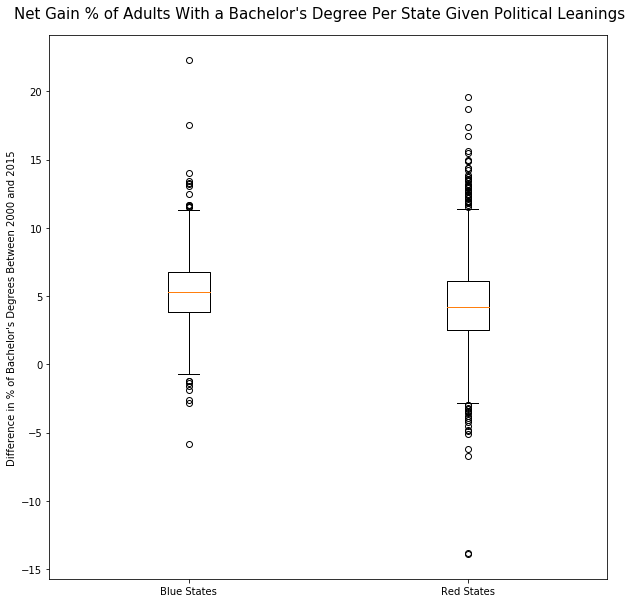

In [34]:
fig = plt.figure(figsize=(10,10))
plt.boxplot([blue_state_means,red_state_means])
plt.xticks([1,2], ["Blue States", "Red States"])
plt.ylabel("Difference in % of Bachelor's Degrees Between 2000 and 2015")
fig.suptitle("Net Gain % of Adults With a Bachelor's Degree Per State Given Political Leanings", fontsize=15, y=0.92)


In [35]:
blue_state_means.mean()

5.406493506493509

In [36]:
red_state_means.mean()

4.378007023704997

In [37]:
blue_state_means.mean() - red_state_means.mean()

1.0284864827885114

Note that, on average, counties in blue states have a higher gain in education rates - 1.02% -  between 2000 and 2015 than counties in red states.

We can use hypothesis testing to answer the question - Do counties in blue states have a *statistically significant* difference in their difference in education rates between 2000 and 2015 than counties in red states?

The null hypothesis is that there is no statistically significant difference in education rates between 2000 and 2015 for red and blue states, while the alternate hypothesis is that blue states have a greater gain in education rates between 2000 and 2015 than red states. This will be a one-sided test at a significance level of 0.05, meaning that we will reject the observed difference (1.028) if it's in the 95th percentile or higher of the bootstrapped differences.

Text(0.5,0.92,'Bootstrapped Differences in Gain in Education Rate Between 2000 and 2015')

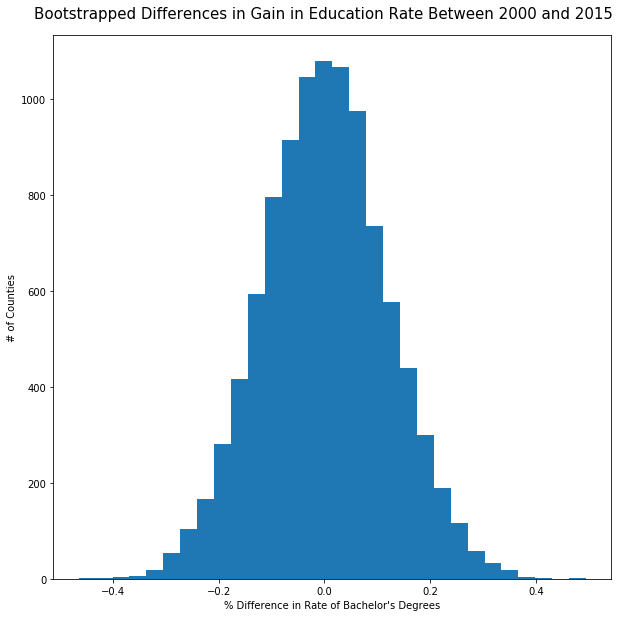

In [38]:
np.random.seed(42)
diff = []
for i in range(10000):
    total = np.concatenate((blue_state_means, red_state_means), axis=None)
    np.random.shuffle(total)
    new_blue = total[:len(blue_state_means)]
    new_red = total[len(blue_state_means):]
    diff.append(np.mean(new_blue) - np.mean(new_red))
fig = plt.figure(figsize=(10,10))
plt.hist(diff, bins=30);
plt.xlabel("% Difference in Rate of Bachelor's Degrees")
plt.ylabel("# of Counties")
fig.suptitle("Bootstrapped Differences in Gain in Education Rate Between 2000 and 2015", fontsize=15, y=0.92)

In [39]:
np.percentile(diff, 95)

0.19729795705132872

In [40]:
stats.percentileofscore(diff, 1.0284864827885114)

100.0

In [41]:
np.max(diff)

0.49482198701609637

The observed difference of 1.02% is greater than any of the 10,000 simulated values. This means that we can reject the null hypothesis in favor of the alternate hypothesis - counties in blue states had a higher gain in the % of the population with bachelor's degrees than counties in red states.

### Conclusion

In conclusion, the rate of adults with bachelors degrees in America has gone up between the two censuses in 2000 and 2015 by 4.7% on average, with a gain in variance and range in the latter survey. Counties with a higher percentage of college education in 2000 tended to have higher *gains* in 'eduation rates' in the next survey. Interestingly, counties in blue states had a statistically higher gain in the percentage of the population with bachelor's degrees than counties in red states. Though it's tempting to infer causality - does a higher percentage of educated voters lead to a county voting Democrat? - it might be an indicator of other factors in the county that are correlated with voting patterns, such as poverty rates and whether a county is rural, suburban, or urban.